In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_dataset = pd.read_csv('dataset/train_set.csv')
train_dataset.head()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
0,1-01-2017,Sunday,7,1,21,17,1
1,1-01-2017,Sunday,7,2,12,34,2
2,1-01-2017,Sunday,7,3,25,24,2
3,1-01-2017,Sunday,7,4,46,41,4
4,1-01-2017,Sunday,7,5,33,19,3


In [4]:
test_dataset = pd.read_csv('dataset/test_data - Sheet1.csv')
test_dataset.head()

,Date,Day,CodedDay,Zone,Weather,Temperature,Traffic
0,01-06-2018,Wednesday,3,2,35,17,2
1,01-06-2018,Wednesday,3,3,36,16,3
2,01-06-2018,Wednesday,3,4,27,25,5
3,01-06-2018,Wednesday,3,5,23,23,3
4,01-06-2018,Wednesday,3,6,18,42,2


In [5]:
X_train = train_dataset.iloc[:, [2,3,4,5]].values
y_train = train_dataset.iloc[:, 6].values

In [6]:
X_train

array([[  7,   1,  21,  17],
       [  7,   2,  12,  34],
       [  7,   3,  25,  24],
       ...,
       [  6, 142,  25,  12],
       [  6, 143,  24,  28],
       [  6, 144,  14,  24]])

In [7]:
y_train

array([1, 2, 2, ..., 3, 1, 1])

In [8]:
X_train.shape

(52416, 4)

In [9]:
X_test = test_dataset.iloc[:, [2,3,4,5]].values
y_test = test_dataset.iloc[:, 6].values

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
X_train

array([[ 1.5       , -1.72006415, -0.17967827, -0.73733883],
       [ 1.5       , -1.69600731, -0.8311836 ,  0.73127039],
       [ 1.5       , -1.67195047,  0.10987965, -0.13261739],
       ...,
       [ 1.        ,  1.67195047,  0.10987965, -1.16928272],
       [ 1.        ,  1.69600731,  0.03749017,  0.21293772],
       [ 1.        ,  1.72006415, -0.68640463, -0.13261739]])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.5350938151494093

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [16]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.5350938151494093

In [17]:
cm

array([[242,  10,  12,   7,   9],
       [ 72, 187,  11,   8,  16],
       [ 79,  47, 134,   6,  11],
       [ 69,  64,  27, 104,  12],
       [102,  59,  36,  12, 103]])

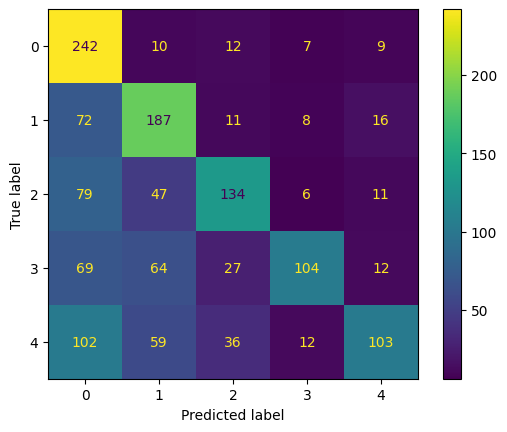

In [18]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [19]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.43      0.86      0.57       280\n           2       0.51      0.64      0.57       294\n           3       0.61      0.48      0.54       277\n           4       0.76      0.38      0.50       276\n           5       0.68      0.33      0.44       312\n\n    accuracy                           0.54      1439\n   macro avg       0.60      0.54      0.53      1439\nweighted avg       0.60      0.54      0.52      1439\n'

In [20]:
from sklearn.ensemble import RandomForestClassifier
rand_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rand_classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [21]:
y_pred1 = rand_classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_test, y_pred1)

In [23]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)

In [24]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred1, average='micro')


0.9888811674774148

In [25]:
cm1

array([[278,   1,   0,   1,   0],
       [  1, 289,   0,   3,   1],
       [  1,   1, 272,   1,   2],
       [  0,   1,   0, 275,   0],
       [  0,   1,   1,   1, 309]])

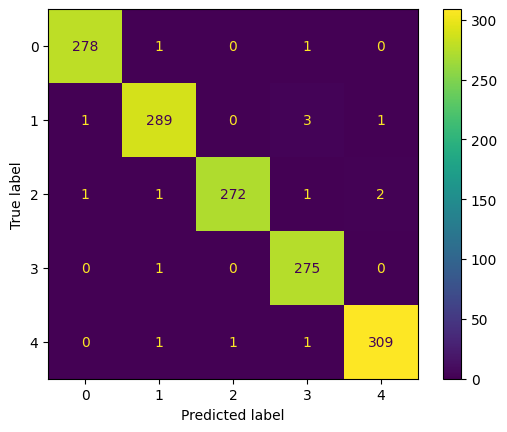

In [26]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot()
plt.show()

In [27]:
classification_report(y_test, y_pred1)

'              precision    recall  f1-score   support\n\n           1       0.99      0.99      0.99       280\n           2       0.99      0.98      0.98       294\n           3       1.00      0.98      0.99       277\n           4       0.98      1.00      0.99       276\n           5       0.99      0.99      0.99       312\n\n    accuracy                           0.99      1439\n   macro avg       0.99      0.99      0.99      1439\nweighted avg       0.99      0.99      0.99      1439\n'

In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
y_pred2 = decision_tree.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test, y_pred2)
ac2


0.9909659485753995

In [31]:
cm2 = confusion_matrix(y_test, y_pred2)

In [32]:
f1_score(y_test, y_pred2, average='micro')

0.9909659485753995

In [33]:
cm2

array([[280,   0,   0,   0,   0],
       [  1, 293,   0,   0,   0],
       [  2,   3, 272,   0,   0],
       [  1,   2,   0, 273,   0],
       [  0,   1,   1,   2, 308]])

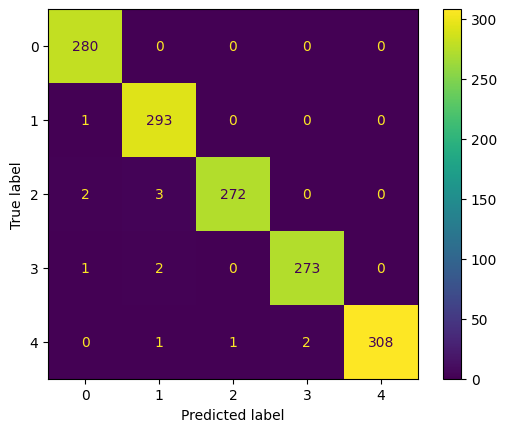

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()
plt.show()

In [35]:
classification_report(y_test, y_pred2)

'              precision    recall  f1-score   support\n\n           1       0.99      1.00      0.99       280\n           2       0.98      1.00      0.99       294\n           3       1.00      0.98      0.99       277\n           4       0.99      0.99      0.99       276\n           5       1.00      0.99      0.99       312\n\n    accuracy                           0.99      1439\n   macro avg       0.99      0.99      0.99      1439\nweighted avg       0.99      0.99      0.99      1439\n'

In [36]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(algorithm='auto')

In [37]:
clustering.fit(X_train, y_train)

DBSCAN()

In [38]:
y_pred3 = clustering.fit_predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
ac3 = accuracy_score(y_test, y_pred3)
ac3

0.01320361362056984

In [41]:
import joblib
joblib.dump(decision_tree,"DecisionTreeClassifier.pkl")
joblib.dump(rand_classifier,"RandomForestClassifier.pkl")
joblib.dump(classifier,"KNeighborsClassifier.pkl")
joblib.dump(sc,"StandardScaler.pkl")

['StandardScaler.pkl']

In [ ]:
import joblib
import numpy as np

# Load trained models and scaler
rf_model = joblib.load('RandomForestClassifier.pkl')
scaler = joblib.load('StandardScaler.pkl')

# Input fields expected: [CodedDay, Zone, Weather, Temperature]
print("Enter input values for Traffic Density Prediction:\n")
coded_day = int(input("Coded Day (1=Monday to 7=Sunday): "))
zone = int(input("Zone (e.g., 2, 3, 4, ...): "))
weather = int(input("Weather (encoded as number): "))
temperature = float(input("Temperature (in Celsius): "))

# Combine into a single feature array
input_data = np.array([[coded_day, zone, weather, temperature]])

# Scale input features
input_scaled = scaler.transform(input_data)

# Make predictions
rf_prediction = rf_model.predict(input_scaled)[0]

# Output results
print("\n🔍 Predicted Traffic Density Levels:")
print(f"Random Forest: {rf_prediction}")

